# Customer segmentation 


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv("customer_segmentation.csv")

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df= df.dropna()

In [10]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

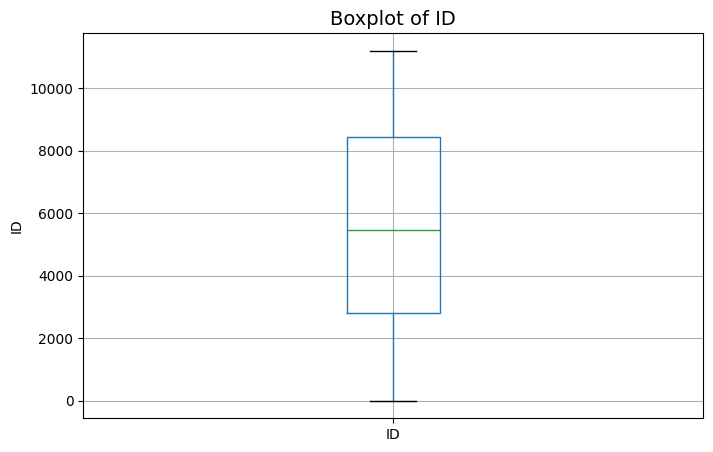

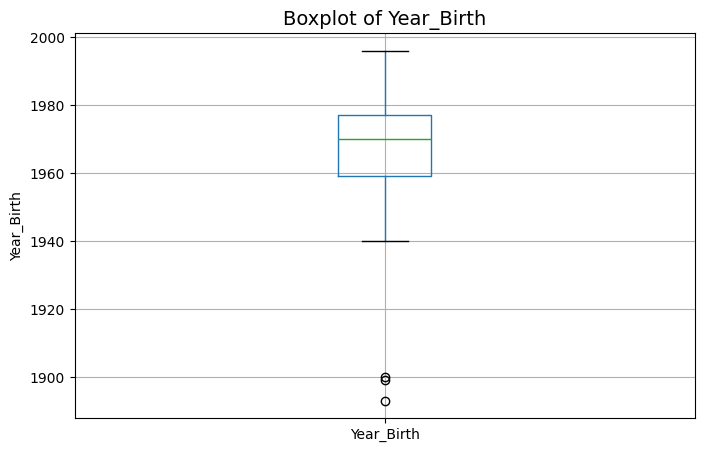

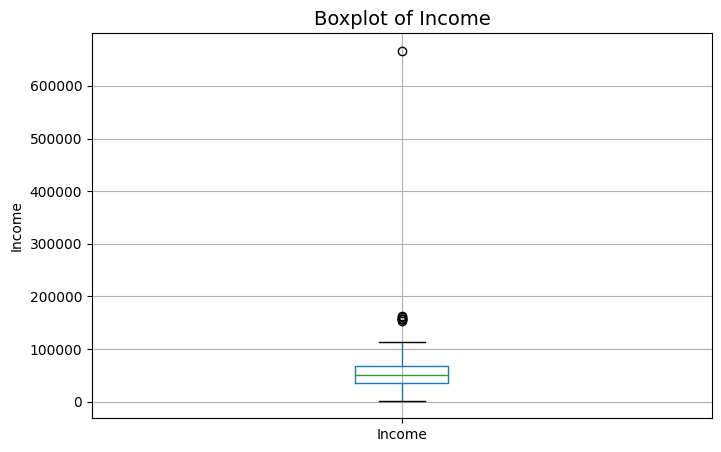

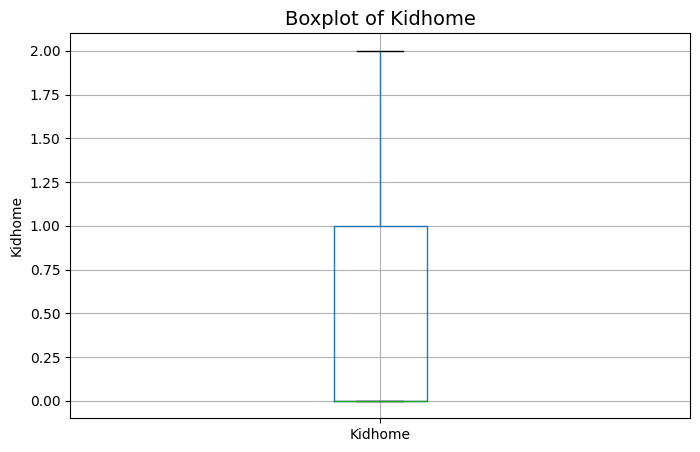

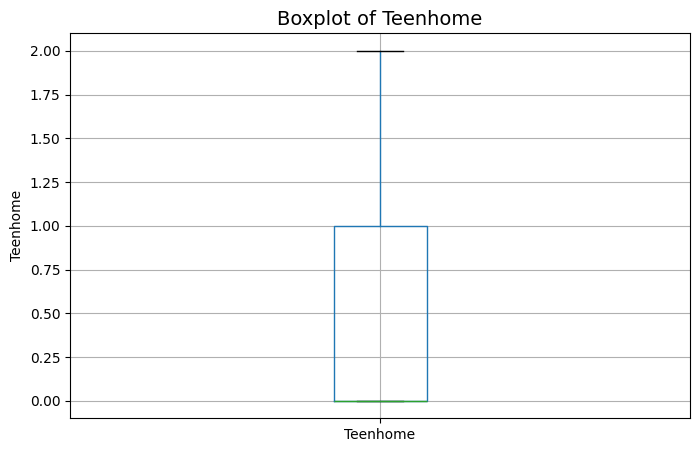

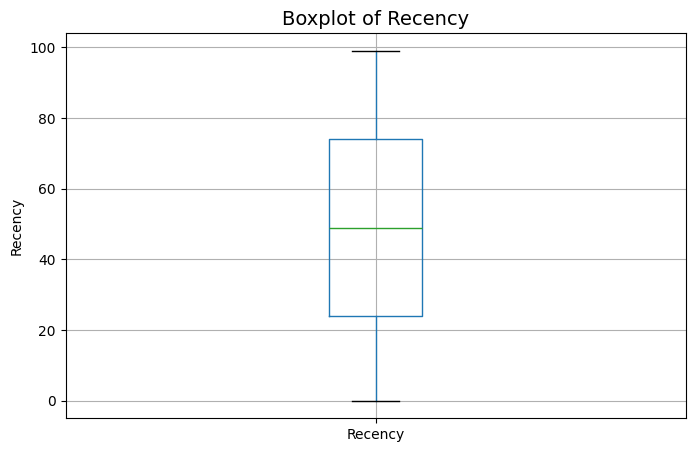

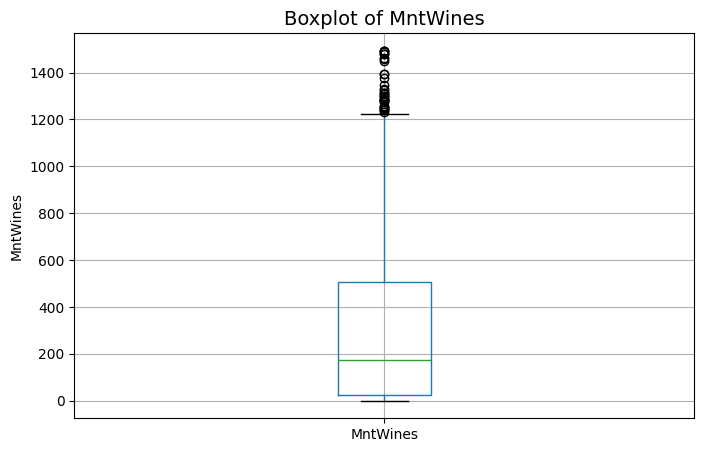

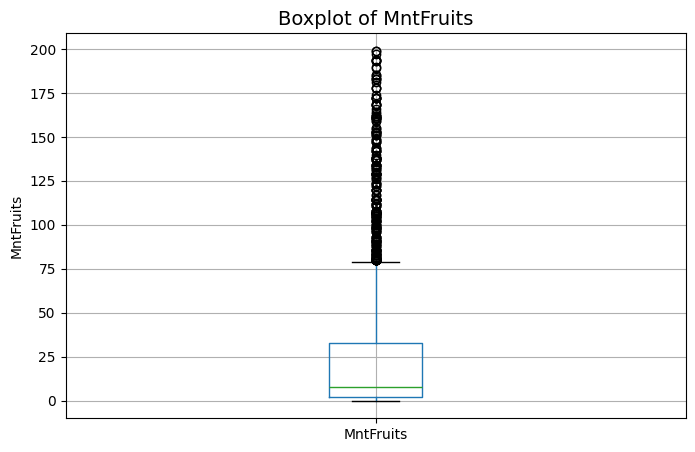

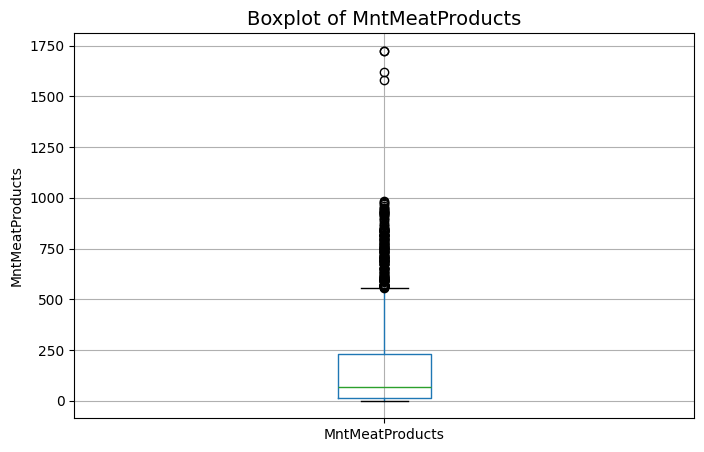

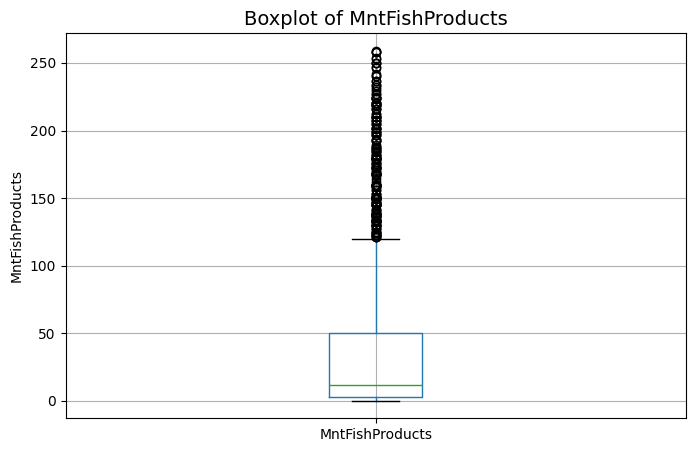

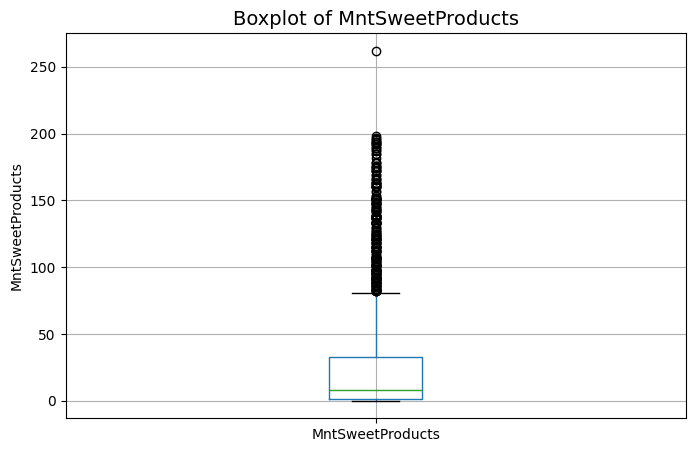

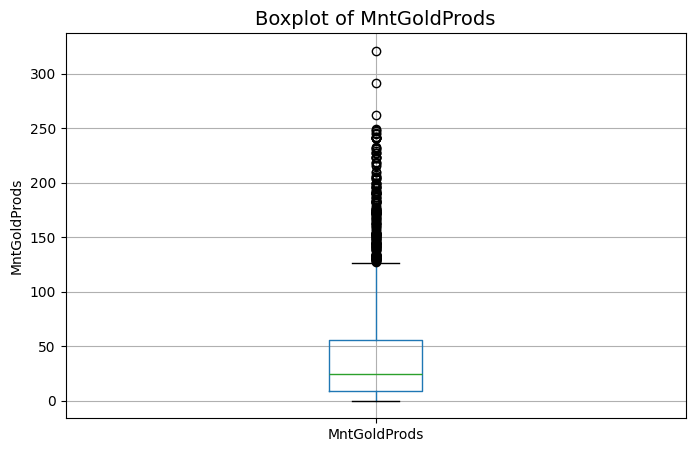

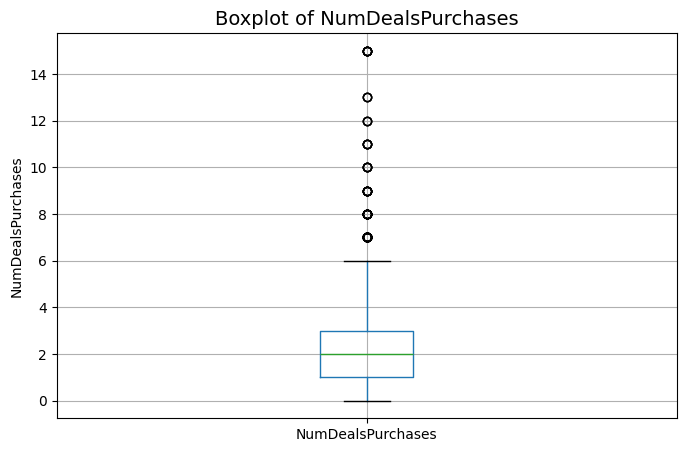

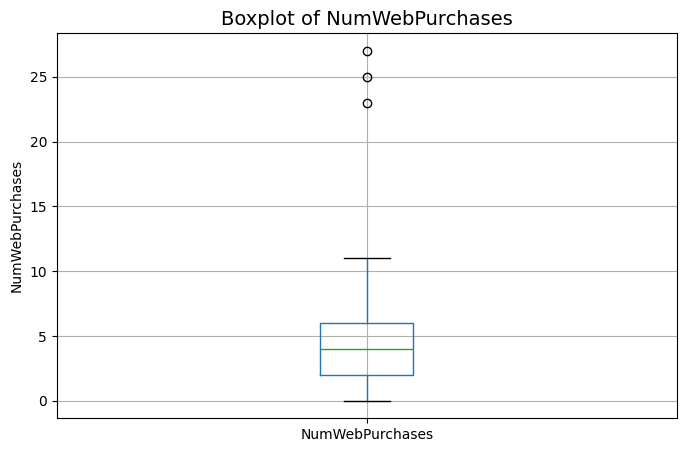

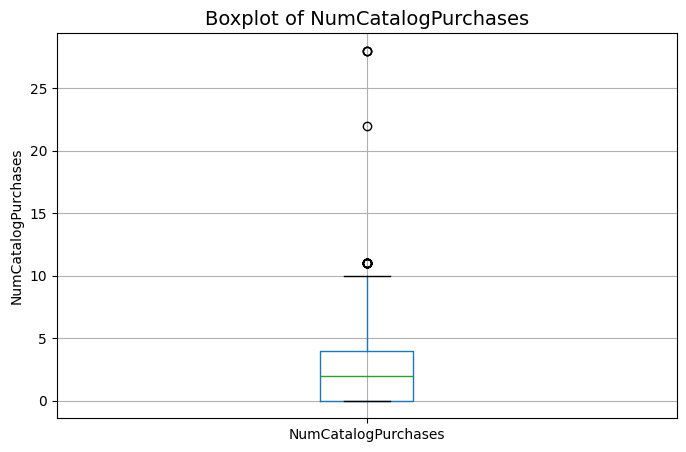

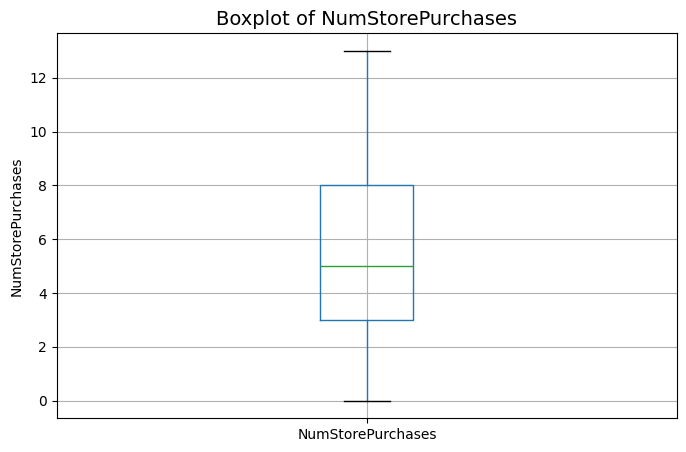

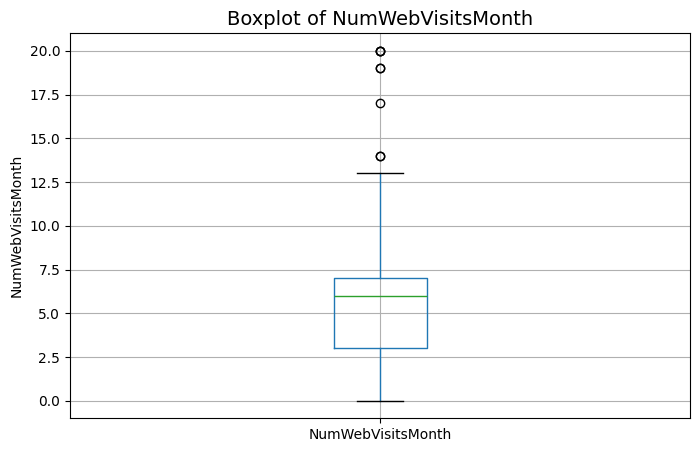

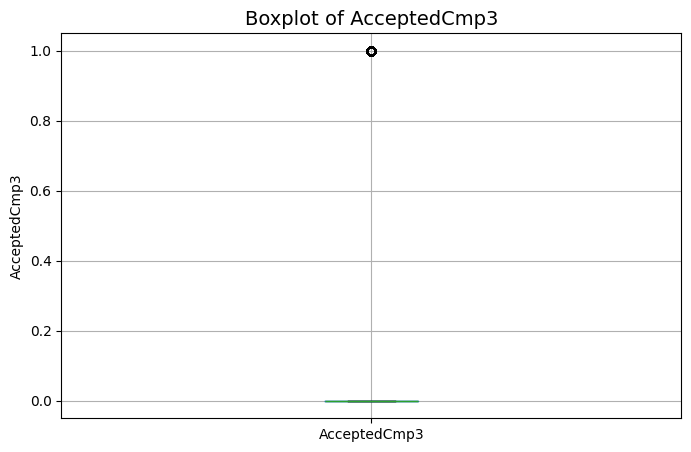

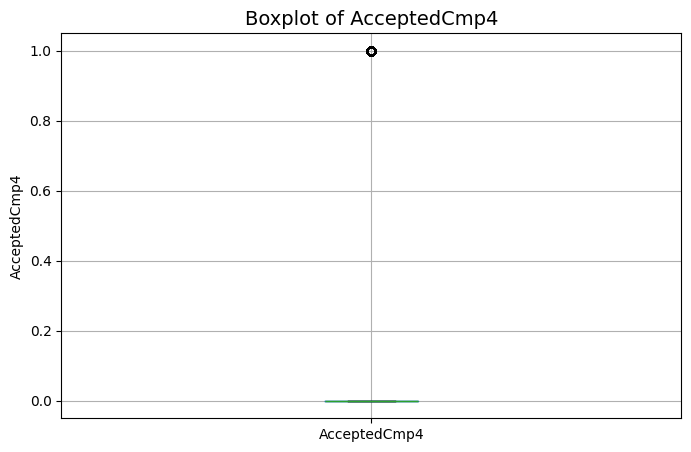

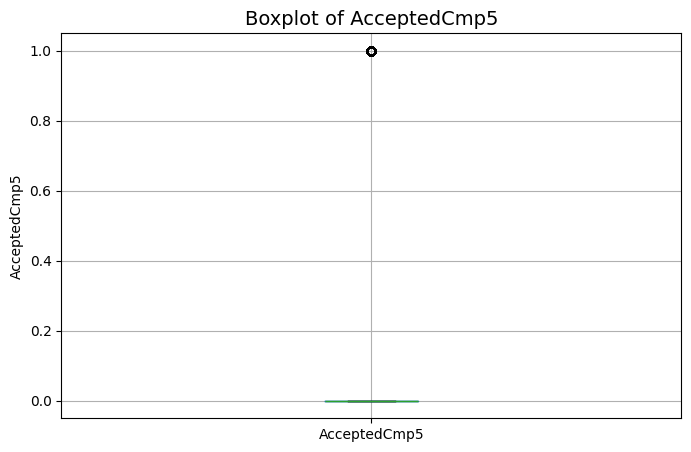

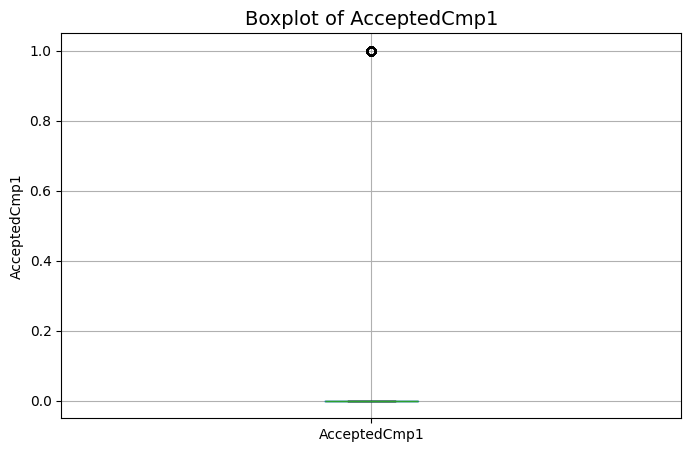

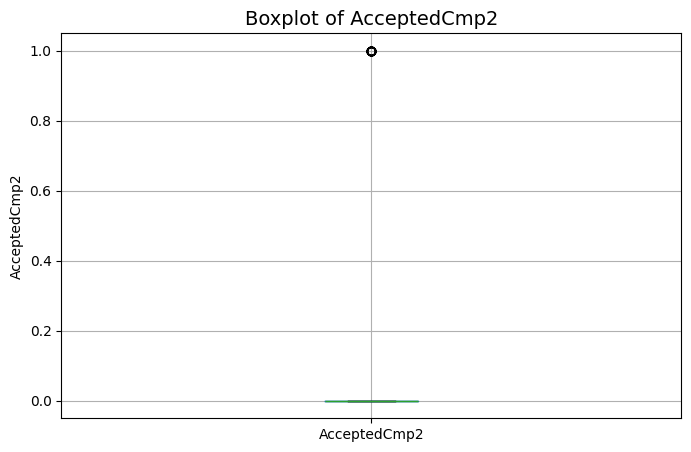

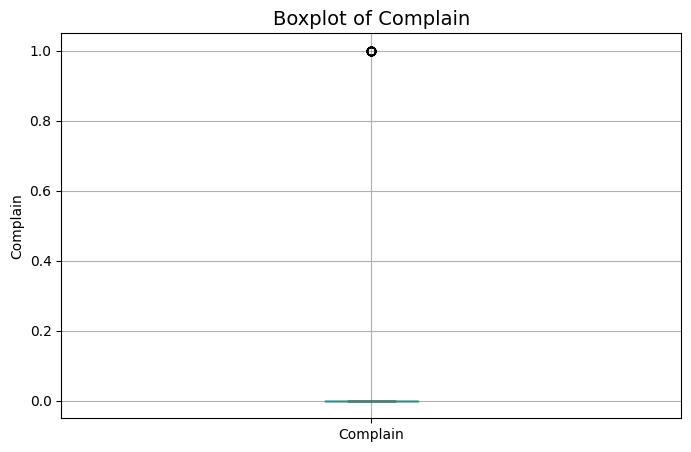

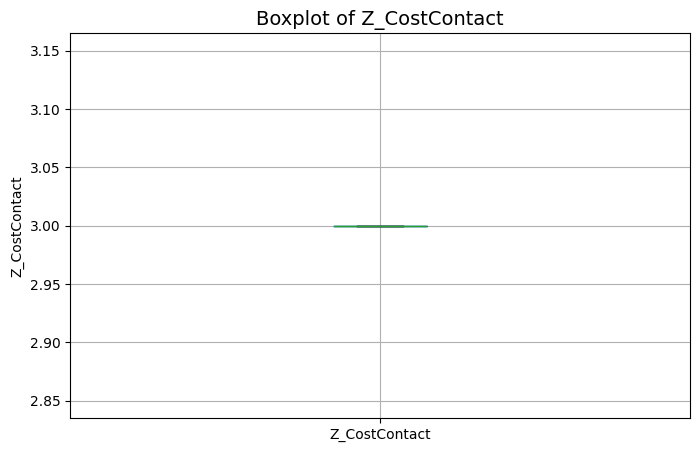

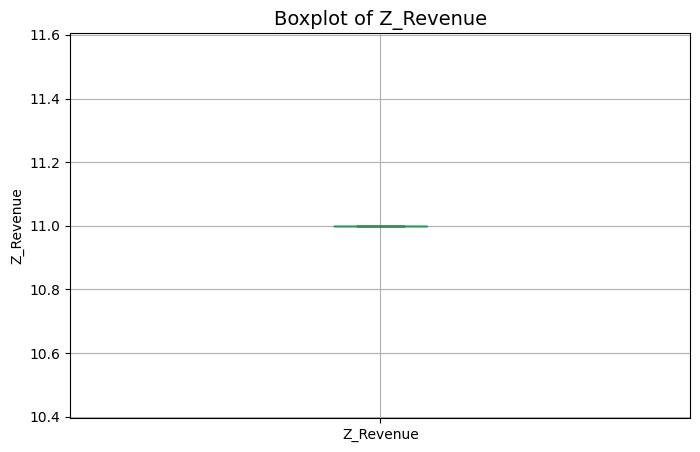

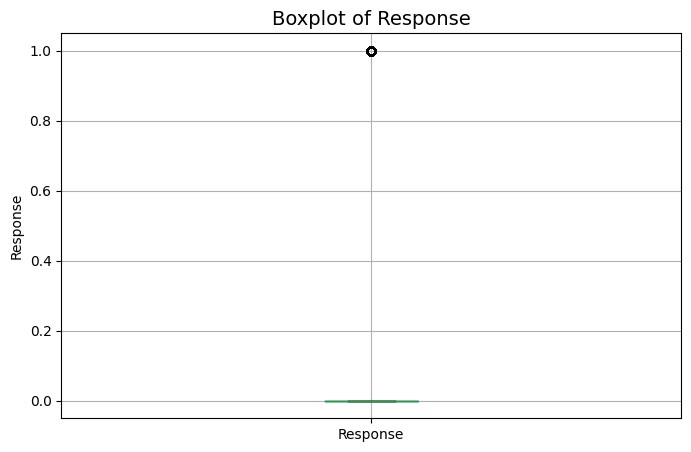

In [15]:
num_cols = df.select_dtypes(include=["number"]).columns

for col in num_cols:
    plt.figure(figsize=(8, 5))   # each plot bigger
    df.boxplot(column=[col])
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.ylabel(col)
    plt.show()

In [16]:
outlier_counts = {}

# Loop through numerical features
for col in df.select_dtypes(include=["number"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_counts[col] = outliers.count()

# Convert to DataFrame for better view
outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_summary)


                     Outlier Count
ID                               0
Year_Birth                       3
Income                           8
Kidhome                          0
Teenhome                         0
Recency                          0
MntWines                        35
MntFruits                      246
MntMeatProducts                174
MntFishProducts                222
MntSweetProducts               246
MntGoldProds                   205
NumDealsPurchases               84
NumWebPurchases                  3
NumCatalogPurchases             23
NumStorePurchases                0
NumWebVisitsMonth                8
AcceptedCmp3                   163
AcceptedCmp4                   164
AcceptedCmp5                   162
AcceptedCmp1                   142
AcceptedCmp2                    30
Complain                        21
Z_CostContact                    0
Z_Revenue                        0
Response                       333


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [18]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [23]:
df["Age"]=2025 -df["Year_Birth"]
df["Totak_child"] = df["Kidhome"] + df["Teenhome"]
spend_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",]

In [24]:
df["total_spending"] =df[spend_cols].sum(axis=1)

In [26]:
df[["total_spending"]]


,total_spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [27]:
df["Customer_Since"] = (pd.Timestamp("today")-df["Dt_Customer"]).dt.days

In [28]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Totak_child,total_spending,Customer_Since
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,68,0,1617,4757
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,71,2,27,4207
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,60,0,776,4406
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,41,1,53,4233
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,44,1,422,4255


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

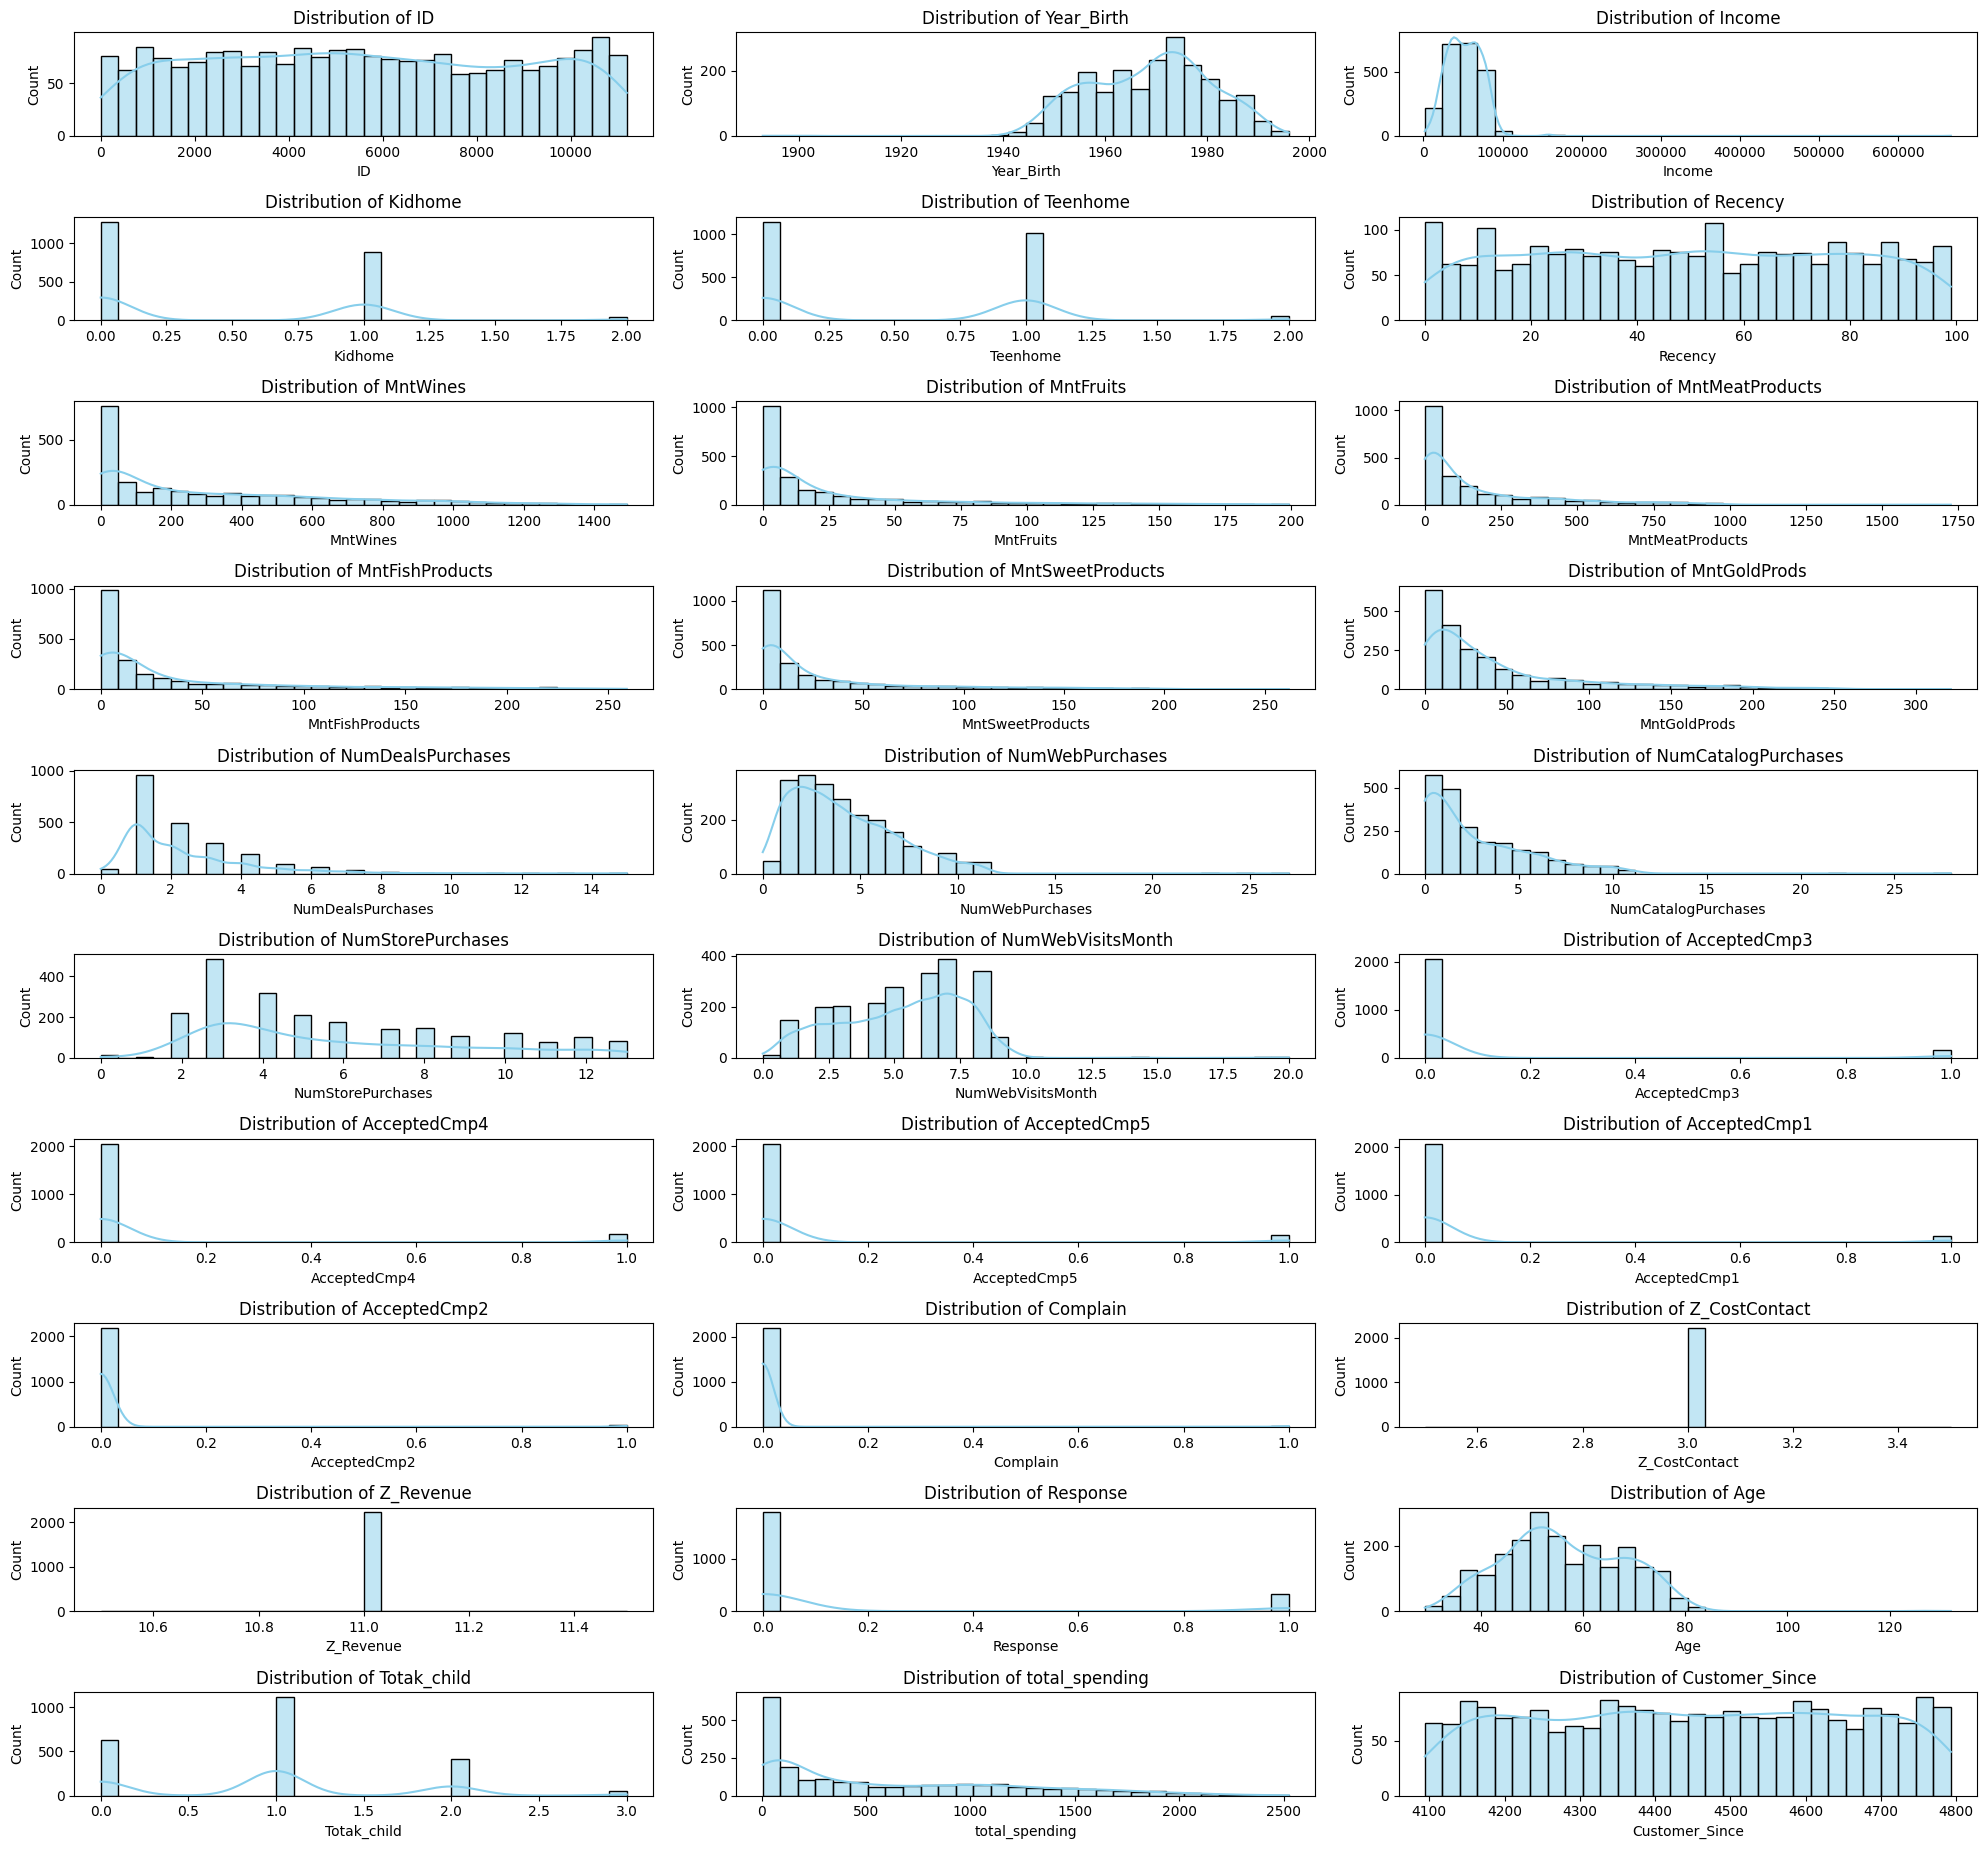

In [30]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot grid
plt.figure(figsize=(20, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)  # 3 plots per row
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

C:\Users\omark\AppData\Local\Temp\ipykernel_3388\2258684804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="Income", data=df, palette="Set2")


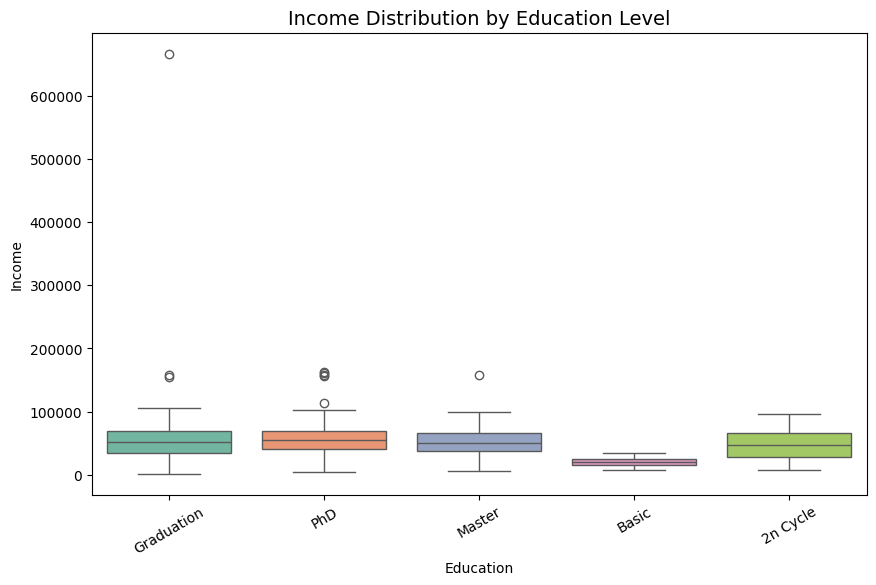

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Education", y="Income", data=df, palette="Set2")
plt.title("Income Distribution by Education Level", fontsize=14)
plt.xticks(rotation=30)
plt.show()


C:\Users\omark\AppData\Local\Temp\ipykernel_3388\610414960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Marital_Status", y="total_spending", data=df, palette="pastel")


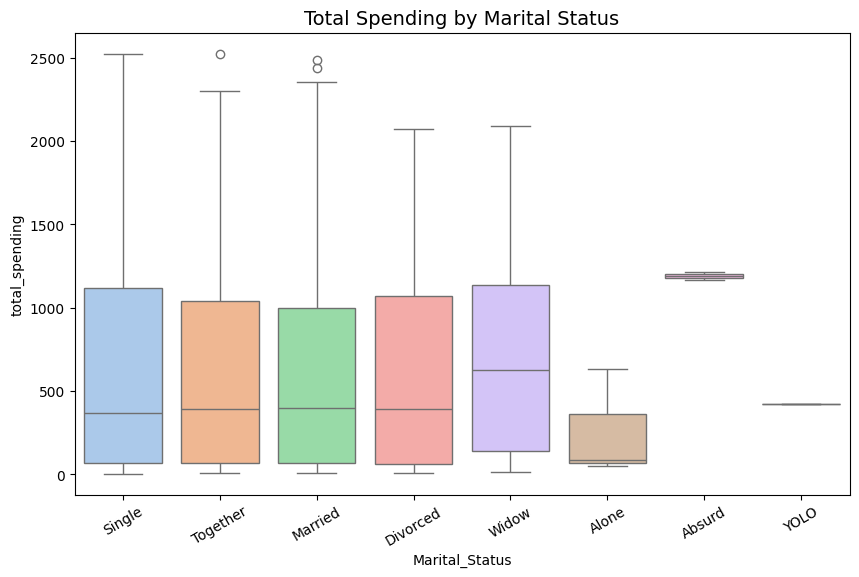

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Marital_Status", y="total_spending", data=df, palette="pastel")
plt.title("Total Spending by Marital Status", fontsize=14)
plt.xticks(rotation=30)
plt.show()


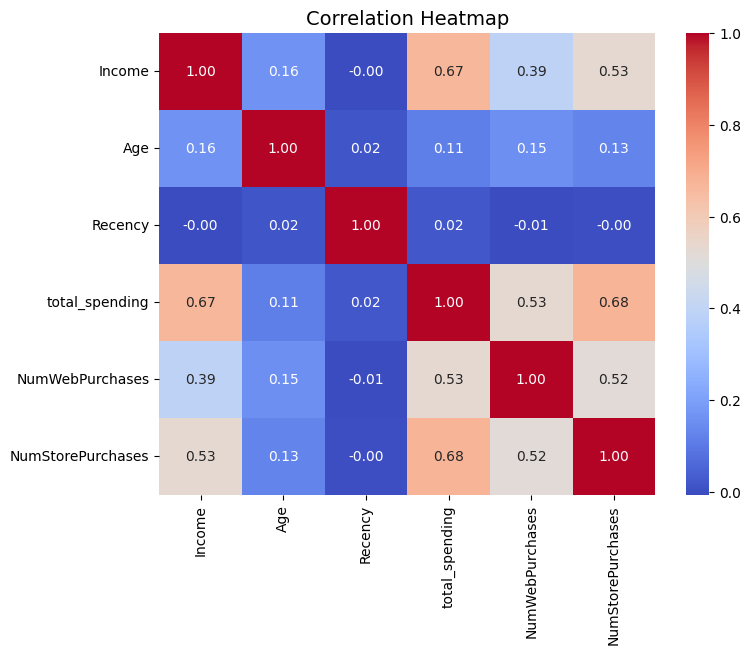

In [34]:
corr = df[["Income", "Age", "Recency", "total_spending", 
           "NumWebPurchases", "NumStorePurchases"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

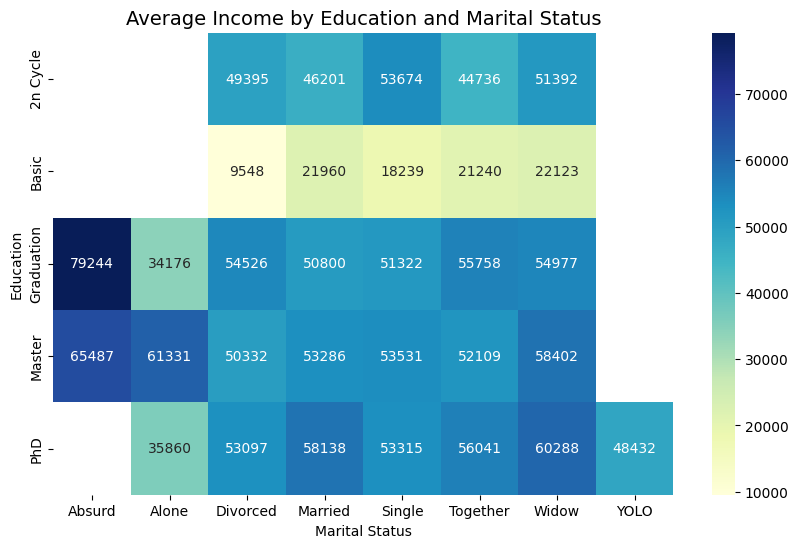

In [37]:
pivot_income = df.pivot_table(
    values="Income",
    index="Education",
    columns="Marital_Status",
    aggfunc="mean"
)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_income, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Income by Education and Marital Status", fontsize=14)
plt.ylabel("Education")
plt.xlabel("Marital Status")
plt.show()

In [40]:
group1 = df.groupby("Education")["total_spending"].mean().sort_values(ascending=False)

In [41]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: total_spending, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PhD'),
  Text(1, 0, 'Graduation'),
  Text(2, 0, 'Master'),
  Text(3, 0, '2n Cycle'),
  Text(4, 0, 'Basic')])

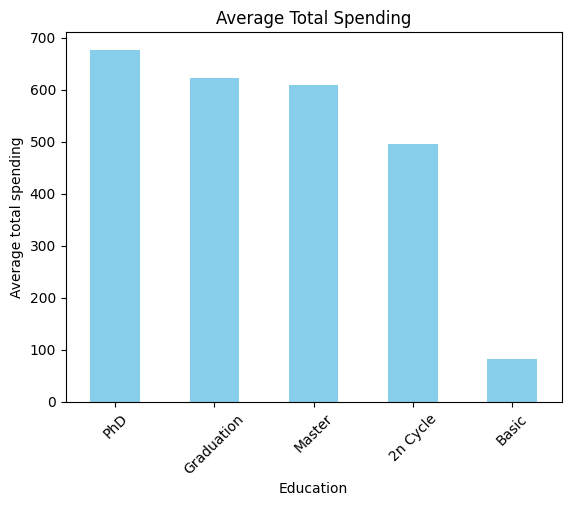

In [44]:
group1.plot(kind= "bar" , color = "skyblue")
plt.title("Average Total Spending")
plt.ylabel("Average total spending")
plt.xticks(rotation = 45)


In [45]:
df["Accepted_Any"] = df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [47]:
df["Accepted_Any"].unique()


array([1, 0, 3, 2, 4, 5])

In [48]:
df["Accepted_Any"] = df["Accepted_Any"].apply(lambda x:1 if x>0 else 0)

In [51]:
group2 = df.groupby("Marital_Status")["Accepted_Any"].mean().sort_values(ascending=False)


In [52]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: Accepted_Any, dtype: float64

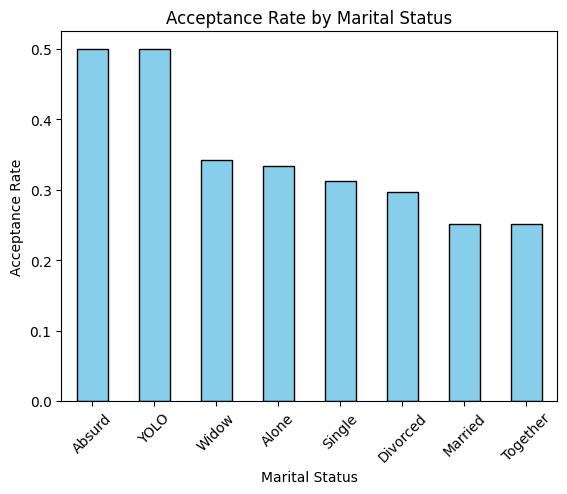

In [54]:
group2.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Acceptance Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)  # rotate labels for readability
plt.show()

In [55]:
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]


In [57]:
df["AgeGroup"] = pd.cut(df["Age"], bins = bins , labels = labels )

In [58]:
df[["AgeGroup"]]

,AgeGroup
0,60-69
1,70+
2,50-59
3,40-49
4,40-49
...,...
2235,50-59
2236,70+
2237,40-49
2238,60-69


In [59]:
group3 = df.groupby("AgeGroup")["Income"].mean()

C:\Users\omark\AppData\Local\Temp\ipykernel_3388\1140876350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean()


Text(0.5, 0, 'Avg Income')

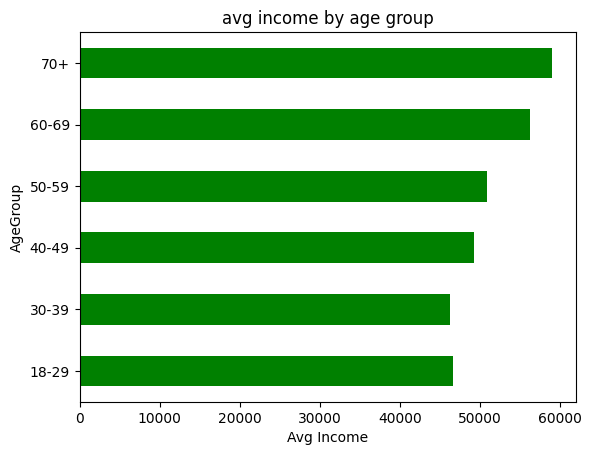

In [60]:
group3.plot(kind = "barh",color = "green")
plt.title("avg income by age group")
plt.xlabel("Avg Income")


In [61]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Totak_child,total_spending,Customer_Since,Accepted_Any,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4757,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4207,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4406,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4233,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4255,0,40-49


In [62]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Totak_child', 'total_spending', 'Customer_Since',
       'Accepted_Any', 'AgeGroup'],
      dtype='object')

In [67]:
Age-Income-total_spending-NumWebPurchases-NumStorePurchases-NumWebVisitsMonth-Recency

NameError: name 'Age' is not defined

In [68]:
features = ["Age","Income","total_spending","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","Recency"]

In [69]:
x = df[features].copy()

In [71]:
x


,Age,Income,total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
X_scaled = scaler.fit_transform(x)

In [74]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [84]:
from sklearn.cluster import KMeans

In [103]:
wcss =[]

In [104]:
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state=42  )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [105]:
wcss

[10218.620143748783,
 9303.349676497386,
 8159.355714963873,
 7578.217065195123,
 7102.818964506342,
 6820.512393778461,
 6445.565381528359,
 6224.740490354578]

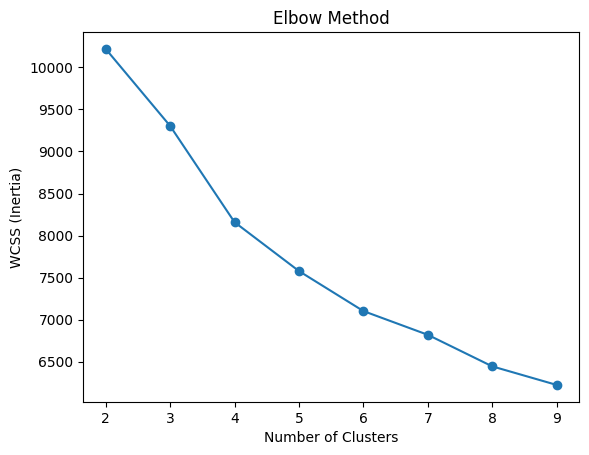

In [106]:
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")
plt.show()


## as we can observe 6 is the optimal 


In [107]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [108]:
df["Cluster"]


0       1
1       5
2       1
3       3
4       0
       ..
2235    1
2236    1
2237    4
2238    2
2239    5
Name: Cluster, Length: 2216, dtype: int32

In [109]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Totak_child,total_spending,Customer_Since,Accepted_Any,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4757,1,60-69,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4207,0,70+,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4406,0,50-59,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4233,0,40-49,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4255,0,40-49,0


In [111]:
cluster_summary = df.groupby("Cluster")[features].mean()

In [112]:
cluster_summary


,Age,Income,total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,49.010499,32433.729659,111.695538,2.283465,3.165354,7.078740,75.813648
1,58.860911,59979.417266,896.014388,8.009592,7.880096,6.398082,46.189448
2,69.318182,73497.366667,1200.709091,4.648485,8.548485,2.754545,51.242424
3,48.975336,33412.621076,120.336323,2.224215,3.327354,6.589686,23.313901
4,46.118902,78234.225610,1296.472561,4.579268,8.533537,2.661585,50.353659
5,68.251592,43293.805732,171.777070,2.595541,4.009554,5.417197,53.000000


In [113]:
df["Cluster"].value_counts()

Cluster
3    446
1    417
0    381
2    330
4    328
5    314
Name: count, dtype: int64

In [116]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

# Assign each principal component to a new column
df["PCA1"] = pca_data[:, 0]
df["PCA2"] = pca_data[:, 1]


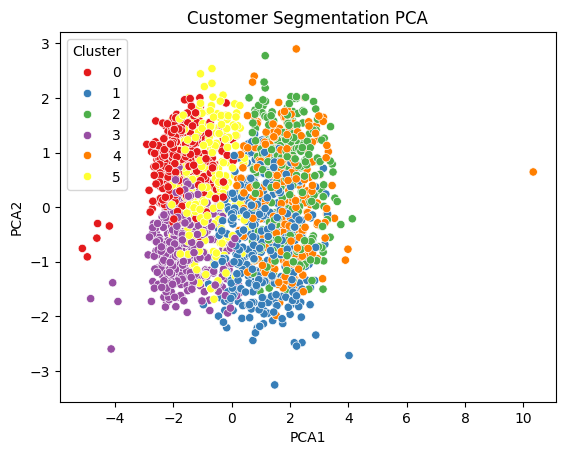

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set1")
plt.title("Customer Segmentation PCA")
plt.show()


In [120]:
cluster_summary


,Age,Income,total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,49.010499,32433.729659,111.695538,2.283465,3.165354,7.078740,75.813648
1,58.860911,59979.417266,896.014388,8.009592,7.880096,6.398082,46.189448
2,69.318182,73497.366667,1200.709091,4.648485,8.548485,2.754545,51.242424
3,48.975336,33412.621076,120.336323,2.224215,3.327354,6.589686,23.313901
4,46.118902,78234.225610,1296.472561,4.579268,8.533537,2.661585,50.353659
5,68.251592,43293.805732,171.777070,2.595541,4.009554,5.417197,53.000000


## Customer Segments

Based on K-Means clustering, we can interpret the clusters as follows:

- **Cluster 0 – Budget Shoppers**  
  - Low income, very low spending.  
  - Visit website frequently but purchase little.  
  - Likely browsing more than buying.  

- **Cluster 1 – Mid-Income Frequent Buyers**  
  - Mid-high income, moderate spending.  
  - Higher web and store purchases.  
  - Likely loyal, active customers.  

- **Cluster 2 – Wealthy Spenders**  
  - High income, very high total spending.  
  - Consistent across web and store purchases.  
  - Premium target segment.  

- **Cluster 3 – Low Income Inactive Customers**  
  - Low income, low spending.  
  - Rare purchases, low engagement.  
  - Not a profitable segment.  

- **Cluster 4 – Affluent Big Spenders**  
  - Very high income, very high spending.  
  - Highest number of store purchases.  
  - Ideal premium customers to retain.  

- **Cluster 5 – Younger Mid-Income Customers**  
  - Mid-range income, moderate spending.  
  - Balanced across channels.  
  - Potential to be grown into loyal buyers.  


In [122]:
import joblib

# Save the trained KMeans model
joblib.dump(kmeans, "customer_segmentor.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']